 **`Stage 1: Data Preparation`**  

==> Data fields with null information:
passengerId      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
dtype: int64
----------------------------------------
Table of outlier values to assess:
     passengerId  survived  pclass   sex   age  sibsp  parch     fare embarked
33            34         0       2  male  66.0      0      0  10.5000        S
54            55         0       1  male  65.0      0      1  61.9792        C
96            97         0       1  male  71.0      0      0  34.6542        C
116          117         0       3  male  70.5      0      0   7.7500        Q
280          281         0       3  male  65.0      0      0   7.7500        Q
456          457         0       1  male  65.0      0      0  26.5500        S
493          494         0       1  male  71.0      0      0  49.5042        C
630          631         1       1  male  80.0      0      0  30.0000

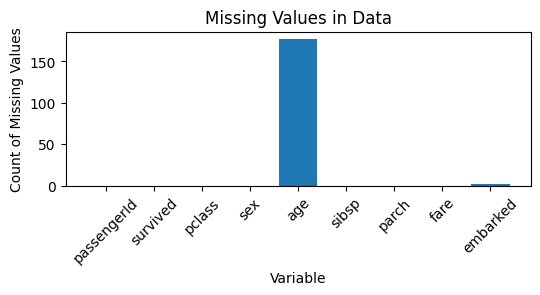

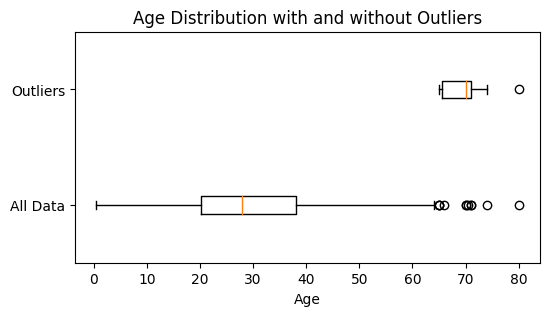

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# URLs to the datasets
url_raw = "https://github.com/cosc-526/home.page/raw/main/data.M.2.titanic.raw.data.xls"
url_train = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_train.csv"
url_test = "https://raw.githubusercontent.com/cosc-526/home.page/main/data.M.2.titanic_test.csv"

# Importing the datasets
df_raw = pd.read_excel(url_raw)
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

# Dropping 'cabin' and 'ticket' columns from all datasets
df_raw = df_raw.drop(columns=['cabin', 'ticket'])
df_train = df_train.drop(columns=['cabin', 'ticket'])
df_test = df_test.drop(columns=['cabin', 'ticket'])

# Step 2: Identifying missing values
print("==> Data fields with null information:")
missing_values = df_train.isnull().sum()
print(missing_values)
print("----------------------------------------")

# Step 3: Identifying outliers using IQR for the 'age' variable
q1 = df_train['age'].quantile(0.25)
q3 = df_train['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_train[(df_train['age'] < lower_bound) | (df_train['age'] > upper_bound)]
print("Table of outlier values to assess:")
print(outliers)
print("----------------------------------------")

# Plotting missing values
plt.figure(figsize=(6, 2))
missing_values = df_train.isnull().sum()
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=45)
plt.xlabel('Variable')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values in Data')
plt.show()

# Plotting outliers using a boxplot
plt.figure(figsize=(6, 3))
plt.boxplot([df_train['age'].dropna(), outliers['age'].dropna()], labels=['All Data', 'Outliers'], vert=False)
plt.xlabel('Age')
plt.title('Age Distribution with and without Outliers')
plt.show()


# Stage 2: Feature Extraction

**2.2:Perform One-Hot Encoding for the Categorical Variable sex**

   pclass  survived                                             name      age  \
0       1         1                    Allen, Miss. Elisabeth Walton  29.0000   
1       1         1                   Allison, Master. Hudson Trevor   0.9167   
2       1         0                     Allison, Miss. Helen Loraine   2.0000   
3       1         0             Allison, Mr. Hudson Joshua Creighton  30.0000   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  25.0000   

   sibsp  parch      fare embarked boat   body  \
0      0      0  211.3375        S    2    NaN   
1      1      2  151.5500        S   11    NaN   
2      1      2  151.5500        S  NaN    NaN   
3      1      2  151.5500        S  NaN  135.0   
4      1      2  151.5500        S  NaN    NaN   

                         home.dest  sex_female  sex_male  
0                     St Louis, MO        True     False  
1  Montreal, PQ / Chesterville, ON       False      True  
2  Montreal, PQ / Chesterville, ON 

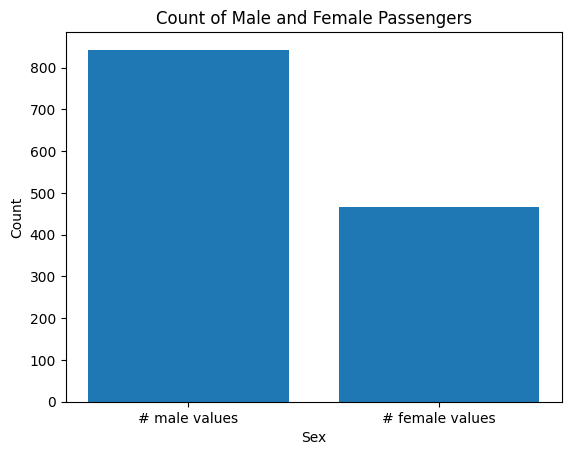

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Perform one-hot encoding on the 'sex' column
df_encoded = pd.get_dummies(df_raw, columns=['sex'])

# Display the first few rows of the dataframe to see the new variables
print(df_encoded.head())

# Visualize the count of male and female passengers
counts = [df_encoded['sex_male'].sum(), df_encoded['sex_female'].sum()]
plt.bar(['# male values', '# female values'], counts)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Male and Female Passengers')
plt.show()


Task 2.3: Perform StandardScaler for the age variable

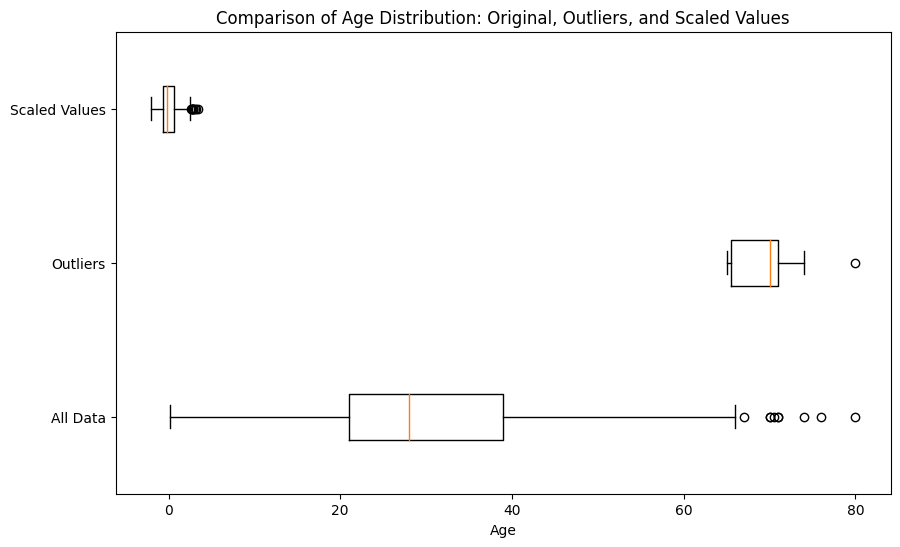

       age  scaled_new_age
0  29.0000       -0.061162
1   0.9167       -2.010496
2   2.0000       -1.935302
3  30.0000        0.008251
4  25.0000       -0.338812


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming `df_train` and `outliers` have been defined previously
# Step 1: Exclude rows with outliers in 'age'
df_train_no_outliers = df_train[~df_train['age'].isin(outliers['age'])].copy()

# Step 2: Initialize the StandardScaler
scaler = StandardScaler()

# Step 3: Apply StandardScaler to the 'age' column and create a new scaled column in `df_raw`
df_raw = df_raw.copy()  # Ensure that `df_raw` is not modified directly
df_raw['scaled_new_age'] = scaler.fit_transform(df_raw[['age']].values.reshape(-1, 1))

# Step 4: Handle missing values by excluding them
age_data = df_raw['age'].dropna()  # Original age data without NaN values
scaled_age_data = df_raw['scaled_new_age'].dropna()  # Scaled age data without NaN values

# Step 5: Combine all age data for visualization
combined_data = [age_data, outliers['age'], scaled_age_data]

# Step 6: Create a boxplot to visualize the distribution of age data, outliers, and scaled values
plt.figure(figsize=(10, 6))
plt.boxplot(combined_data, labels=['All Data', 'Outliers', 'Scaled Values'], vert=False)
plt.xlabel('Age')
plt.title('Comparison of Age Distribution: Original, Outliers, and Scaled Values')
plt.show()

# Optional: Print the first few rows of the dataframe to verify scaling
print(df_raw[['age', 'scaled_new_age']].head())



**Q: Would you perform supervised or unsupervised machine learning?:**  
Since the target variable is survival,i would do supervised machine learning. Supervised learning is used when we know the output labels and want to predict outcomes based on input features


**Q: What algorithms would you choose to run?**
Logistic Regression: Simple and interpretable for binary outcomes.
Random Forest: Handles mixed data types and is robust to overfitting.
Support Vector Machine (SVM): Effective for finding decision boundaries in high-dimensional space.

---



# Task.3 - write a description confirming the 5 sequences of machine learning activities, with a short description of each



**1.Data Preprocessing**:

**Imputation:** Missing values in the dataset are handled using mean imputation. This ensures that the dataset is complete by filling in missing values with the mean of the respective column, which prevents data loss and biases.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)


**Encoding:** Categorical variables (e.g., 'sex') are transformed into numerical features using one-hot encoding. This technique creates binary columns for each category, enabling the model to use categorical information.

X_encoded = pd.get_dummies(X, drop_first=True)



**2 Data Splitting:**
The dataset is split into training and testing sets using train_test_split. This ensures that the model is trained on one subset of the data and evaluated on another, which is crucial for assessing its generalization ability.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


 **3. Model Training:**
 Logistic Regression: The model is trained using logistic regression, which is suitable for binary classification tasks. It estimates the probability of survival based on the input features.

 from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


  **4.Prediction:**
Predictions are made on the test set to evaluate how well the model performs with new data. This step assesses the model's practical utility and accuracy.

y_pred = model.predict(X_test)


**5. Evaluation:**
The model’s accuracy is computed to understand the proportion of correct predictions. Additionally, the confusion matrix provides a detailed breakdown of the types of errors made.

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 2))



# Task 4: Understanding Evaluation Activities

**1.Accuracy Assessment**:

Accuracy measures the proportion of correct predictions made by the model. It provides a straightforward indication of how well the model is performing overall.

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 2))


**2.Confusion Matrix:**

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

The confusion matrix provides detailed insight into the model’s performance by showing the counts of true and false predictions for each class. This helps in identifying which classes are being confused with each other.

# Task 5: Understanding Visualization Activities

**1.Create Confusion Matrix**:Use confusion_matrix from sklearn.metrics to generate the matrix from the true and predicted labels.

**2.Plot Confusion Matrix:**
Use matplotlib.pyplot to visualize the confusion matrix. This includes setting up the color map, labeling the matrix cells, and adding axis labels.